In [5]:
# Exercise 03: Carry out mapping to gaussian distribution of numeric variables from the given data

# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

# import libraries required for preprocessing
import sklearn as sk
from scipy import stats
from sklearn import preprocessing

# set the working directory # in the example, the folder 'packt_exercises' is in the desktop
os.chdir("/Users/svk/Desktop/packt_exercises")

# read the downloaded input data (marketing data)
df = pd.read_csv('bank.csv', sep=';')
# df = pd.read_csv('auto_loan.csv')

In [6]:
# lets segment the data to numeric and categorical and carry out distribution transformation on the numeric data

# for getting numerical data from the raw data
numeric_df = df._get_numeric_data()
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [7]:
# loop for identifying the columns with non-normal distribution 
numeric_df_array = np.array(numeric_df) # converting to numpy arrays for more efficient computation

loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

p = 1.98749e-70
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.08647e-278
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


In [9]:
# create a PowerTransformer based transformation (box-cox) (note: box-cox can handle only positive values)
#pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # applicable if box-cox is used
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True) # applicable if yeo-johnson is used

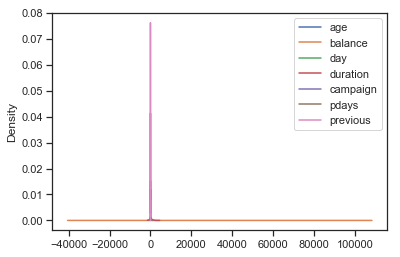

In [10]:
# select columns to  normalize
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)

# density plots of the features to check the normality
columns_to_normalize.plot.kde(bw_method=3)

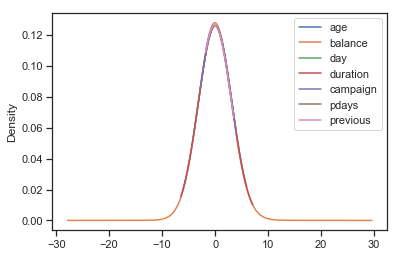

In [11]:
# transforming to normal distribution
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)

# density plots of the features to check the normality
normalized_columns.plot.kde(bw_method=3)

In [12]:
# loop for identifying the columns with non-normal distribution on the transformed data
numeric_df_array = np.array(normalized_columns) # converting to numpy arrays for more efficient computation

loop_c = -1

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

p = 5.41642e-23
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 1.64649e-201
The null hypothesis can be rejected: non-normal distribution
p = 0.00189662
The null hypothesis cannot be rejected: normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.97301e-248
The null hypothesis can be rejected: non-normal distribution
p = 4.44408e-248
The null hypothesis can be rejected: non-normal distribution


In [13]:
# select columns to not normalize
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)

# binding both the non-normalized and normalized columns
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)

numeric_df_normalized.head()

,age,balance,day,duration,campaign,pdays,previous
0,-1.140684,0.282211,0.432746,-0.888110,-1.114491,-0.469086,-0.469131
1,-0.743809,1.209846,-0.525308,0.166967,-1.114491,2.154063,2.184828
2,-0.502259,0.130429,0.090102,-0.023029,-1.114491,2.153496,2.044698
3,-1.140684,0.174936,-1.721685,0.056370,1.077851,-0.469086,-0.469131
4,1.526244,-0.445382,-1.382422,0.196908,-1.114491,-0.469086,-0.469131


In [16]:
numeric_df_normalized.mean()

age         9.501726e-16
balance     3.868038e-17
day        -1.256828e-16
duration    5.538345e-16
campaign   -3.887500e-16
pdays      -1.443953e-16
previous   -2.857455e-16
dtype: float64

In [9]:
# apply on a new dataset (evaluation data)

# read data
df = pd.read_csv('bank.csv', sep=';')

# for getting numerical data from the raw data
numeric_df = df._get_numeric_data()
numeric_df_eval = numeric_df.head(10)

columns_to_normalize_eval = numeric_df_eval[numeric_df_eval.columns[col_for_normalization]]
columns_to_normalize_eval.head()
columns_to_normalize_eval = pt.transform(columns_to_normalize_eval)
columns_to_normalize_eval = pd.DataFrame(columns_to_normalize_eval, columns=names_col)

columns_to_normalize_eval.head()

,age,day,duration,campaign
0,2.496086,9.878963,6.217047,0.000000
1,2.545174,6.268177,8.379996,0.000000
2,2.575033,8.590610,7.989852,0.000000
3,2.496086,1.658451,8.152847,0.956134
4,2.825718,2.991681,8.441514,0.000000
